In [61]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sc
import math as math
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
df = pd.read_csv(r'C:\Users\kiran\OneDrive\Desktop\venkat_ml_ass\HealthCareDataSet - Sheet1.csv',
                 usecols=[1,2,3,4,7,8,9,10,11,12])

In [37]:
print(df)

       LengthOfStay  ReadmissionCount Gender  FacilityId  \
0                 5               2.0      F        1338   
1                 3               1.0      F        4964   
2                 6               NaN      M        7593   
3                 5               NaN      M        1739   
4                 5               NaN      M        1703   
...             ...               ...    ...         ...   
10994             4               2.0      M        3019   
10995             2               NaN      F        9036   
10996             4               1.0      F        1486   
10997             3               3.0      F        2590   
10998             3               1.0      M        3765   

       PyschologicalAilments SubstanceAbuseHistory   BMI    ABG  Pulse  \
0                      False                   NaN  32.7  152.0   64.0   
1                       True                   NaN  31.1  165.0  105.0   
2                      False                   NaN  32.4 

In [25]:
print(df.shape)

(10999, 10)


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           10999 non-null  int64  
 1   ReadmissionCount       5429 non-null   float64
 2   Gender                 10999 non-null  object 
 3   FacilityId             10999 non-null  int64  
 4   PyschologicalAilments  10999 non-null  bool   
 5   SubstanceAbuseHistory  1527 non-null   object 
 6   BMI                    10997 non-null  float64
 7   ABG                    10999 non-null  float64
 8   Pulse                  10997 non-null  float64
 9   SecondaryDiagnosis     10760 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 784.2+ KB
None


In [27]:
print(df.describe(include='all'))

        LengthOfStay  ReadmissionCount Gender    FacilityId  \
count   10999.000000       5429.000000  10999  10999.000000   
unique           NaN               NaN      2           NaN   
top              NaN               NaN      F           NaN   
freq             NaN               NaN   6011           NaN   
mean        4.554232          1.883036    NaN   5005.584235   
std         3.302963          1.102079    NaN   2872.477964   
min         1.000000          1.000000    NaN      2.000000   
25%         2.000000          1.000000    NaN   2549.000000   
50%         4.000000          2.000000    NaN   4994.000000   
75%         6.000000          2.000000    NaN   7495.000000   
max        29.000000          5.000000    NaN   9999.000000   

       PyschologicalAilments SubstanceAbuseHistory           BMI  \
count                  10999                  1527  10997.000000   
unique                     2                     5           NaN   
top                    False           

# one hot encoding

In [28]:
one_hot_encode_data = pd.get_dummies(df, columns=['Gender','SubstanceAbuseHistory','PyschologicalAilments'], dtype=float)

In [29]:
print(one_hot_encode_data)

       LengthOfStay  ReadmissionCount  FacilityId   BMI    ABG  Pulse  \
0                 5               2.0        1338  32.7  152.0   64.0   
1                 3               1.0        4964  31.1  165.0  105.0   
2                 6               NaN        7593  32.4  111.0   53.0   
3                 5               NaN        1739  31.2  175.0   44.0   
4                 5               NaN        1703  31.9  114.0   93.0   
...             ...               ...         ...   ...    ...    ...   
10994             4               2.0        3019  27.6  107.0   83.0   
10995             2               NaN        9036  26.5  133.0   69.0   
10996             4               1.0        1486  28.5  177.0  108.0   
10997             3               3.0        2590   NaN  138.0    NaN   
10998             3               1.0        3765   NaN  182.0    NaN   

       SecondaryDiagnosis  Gender_F  Gender_M  SubstanceAbuseHistory_Few  \
0                     2.0       1.0       0.0  

In [30]:
print(one_hot_encode_data.shape)

(10999, 16)


In [14]:
print(one_hot_encode_data.describe(include='all'))

       LengthOfStay  ReadmissionCount    FacilityId           BMI  \
count  10999.000000       5429.000000  10999.000000  10997.000000   
mean       4.554232          1.883036   5005.584235     29.059925   
std        3.302963          1.102079   2872.477964      2.006137   
min        1.000000          1.000000      2.000000     19.800000   
25%        2.000000          1.000000   2549.000000     27.700000   
50%        4.000000          2.000000   4994.000000     29.000000   
75%        6.000000          2.000000   7495.000000     30.400000   
max       29.000000          5.000000   9999.000000     36.700000   

                ABG         Pulse  SecondaryDiagnosis      Gender_F  \
count  10999.000000  10997.000000        10760.000000  10999.000000   
mean     142.644591     77.751023            2.446933      0.546504   
std       30.329310     18.135555            1.779553      0.497855   
min       -1.010000     10.000000            0.000000      0.000000   
25%      123.000000    

In [31]:
print(one_hot_encode_data.isnull().sum())

LengthOfStay                        0
ReadmissionCount                 5570
FacilityId                          0
BMI                                 2
ABG                                 0
Pulse                               2
SecondaryDiagnosis                239
Gender_F                            0
Gender_M                            0
SubstanceAbuseHistory_Few           0
SubstanceAbuseHistory_Slight        0
SubstanceAbuseHistory_Some          0
SubstanceAbuseHistory_Unknown       0
SubstanceAbuseHistory_Yes           0
PyschologicalAilments_False         0
PyschologicalAilments_True          0
dtype: int64


In [32]:
print(one_hot_encode_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LengthOfStay                   10999 non-null  int64  
 1   ReadmissionCount               5429 non-null   float64
 2   FacilityId                     10999 non-null  int64  
 3   BMI                            10997 non-null  float64
 4   ABG                            10999 non-null  float64
 5   Pulse                          10997 non-null  float64
 6   SecondaryDiagnosis             10760 non-null  float64
 7   Gender_F                       10999 non-null  float64
 8   Gender_M                       10999 non-null  float64
 9   SubstanceAbuseHistory_Few      10999 non-null  float64
 10  SubstanceAbuseHistory_Slight   10999 non-null  float64
 11  SubstanceAbuseHistory_Some     10999 non-null  float64
 12  SubstanceAbuseHistory_Unknown  10999 non-null 

# Finding correlation

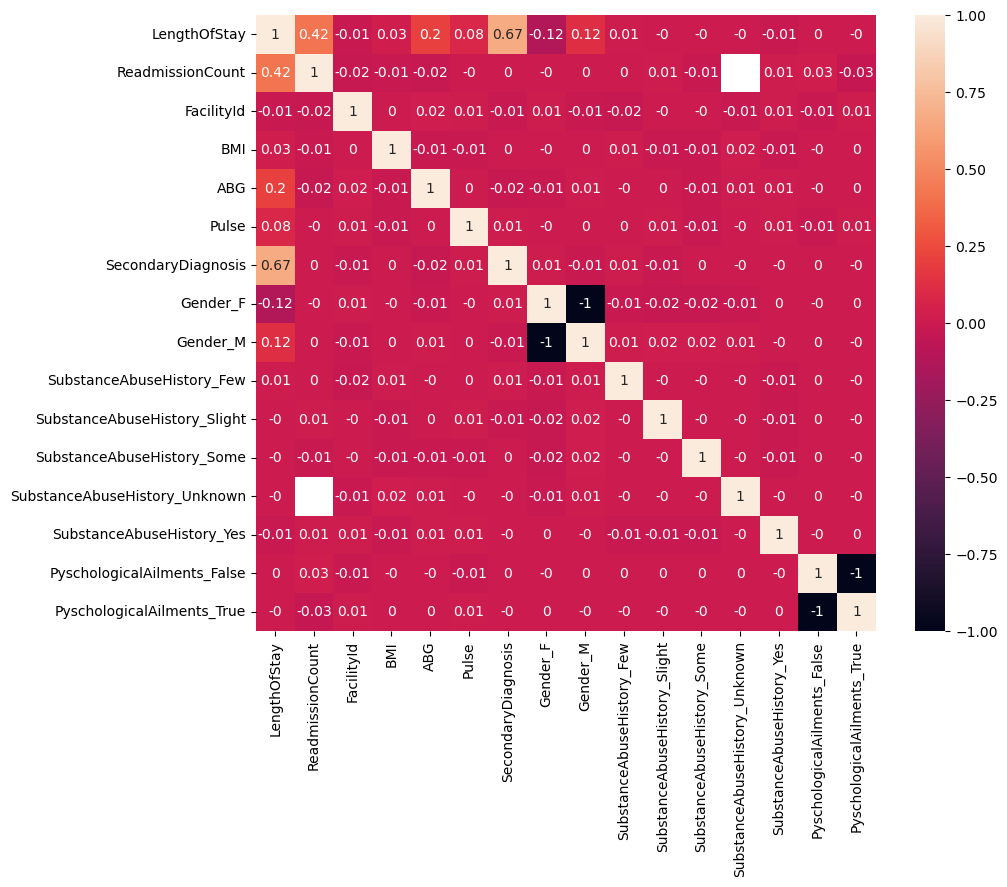

In [35]:
pl.figure(figsize = (10,8))
corr = one_hot_encode_data.corr().round(2)
sc.heatmap(corr, annot=True)
pl.show()

# Scatter Plot  between lenghtOfStay and different features

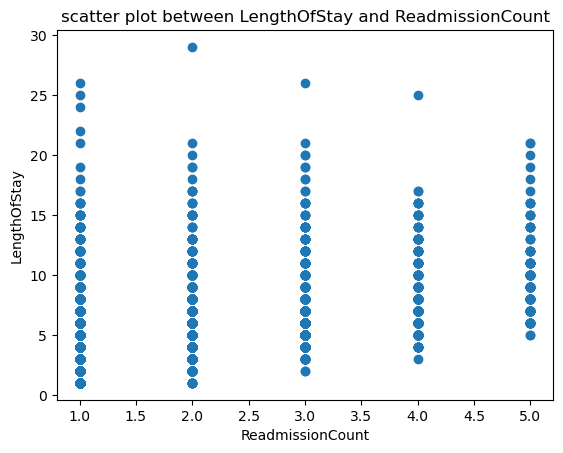

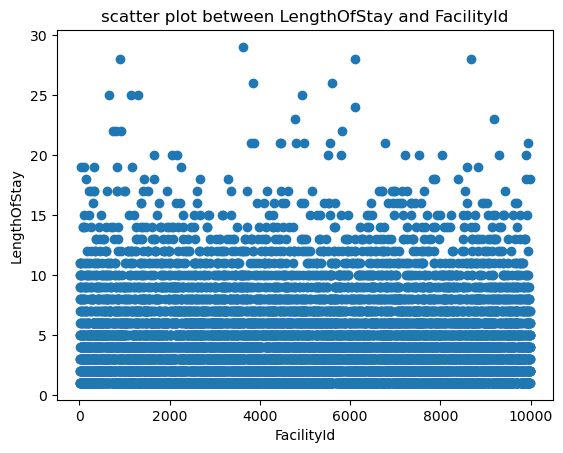

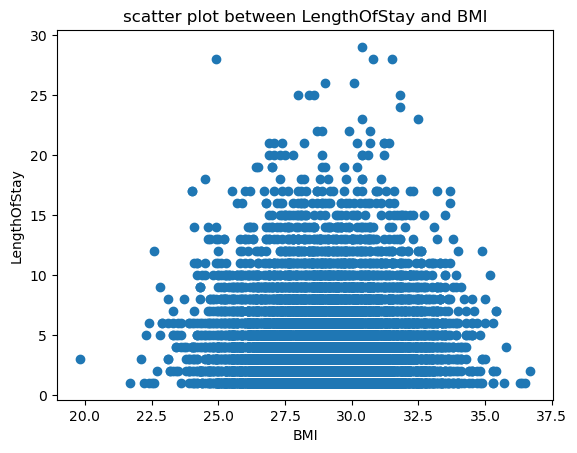

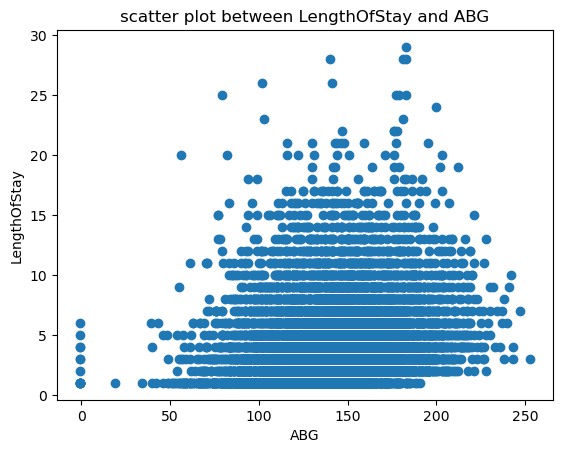

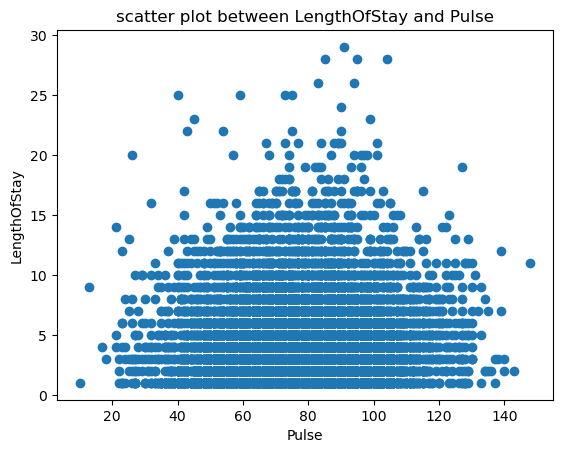

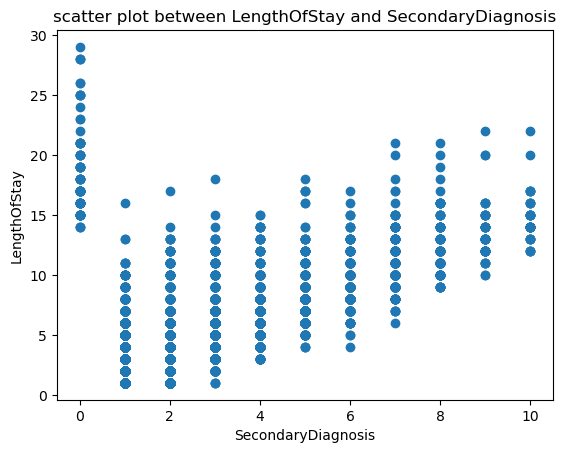

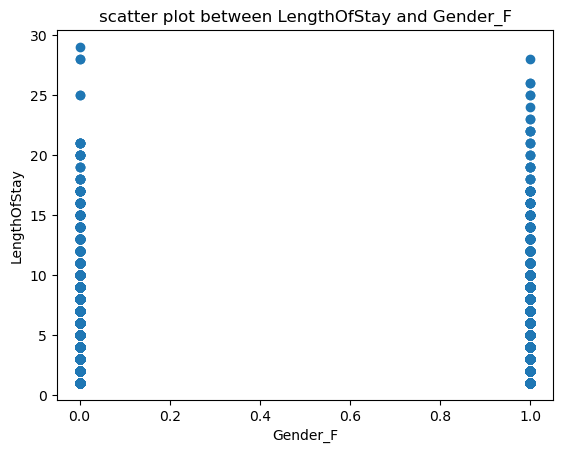

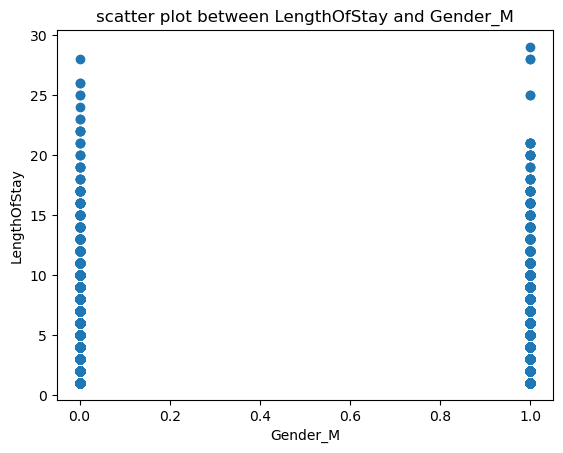

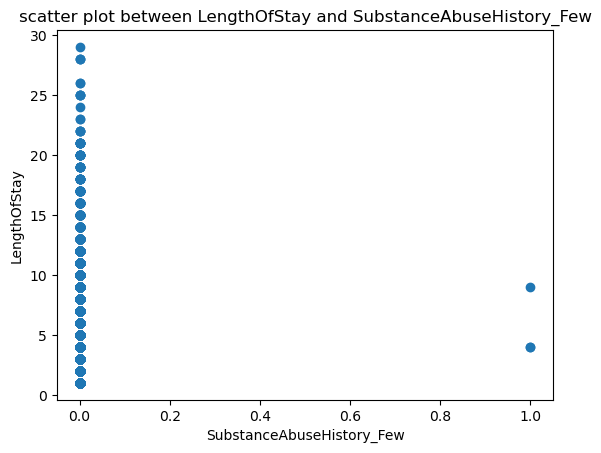

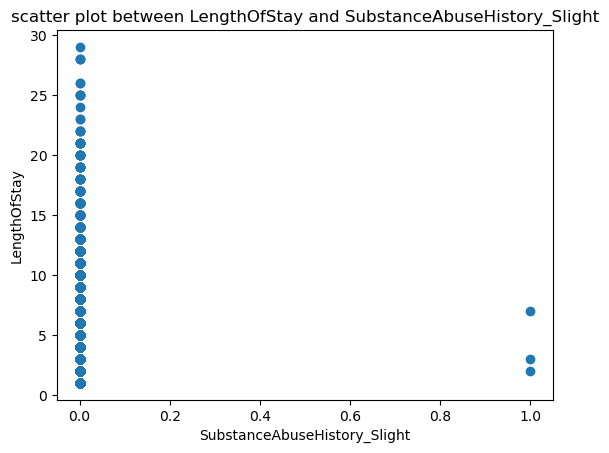

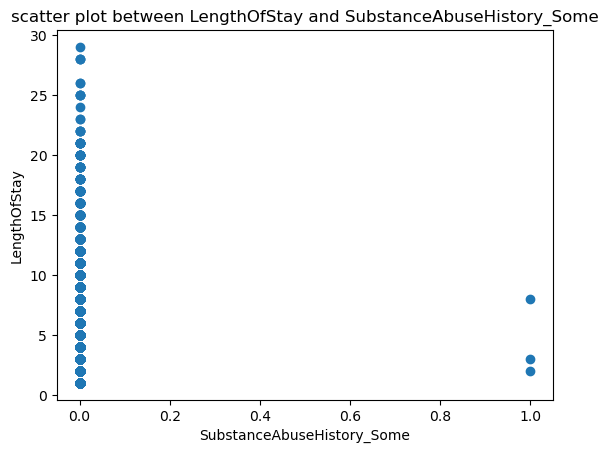

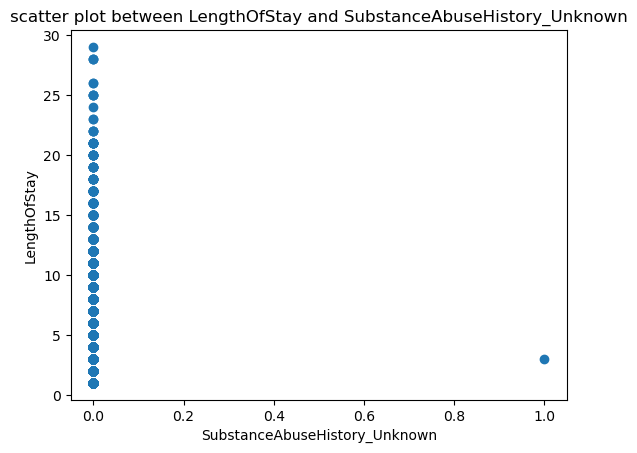

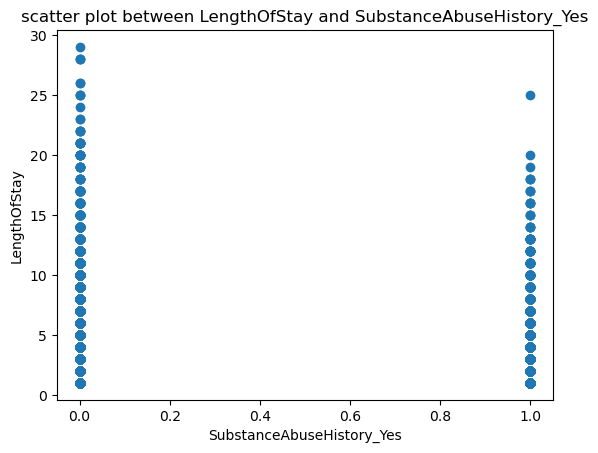

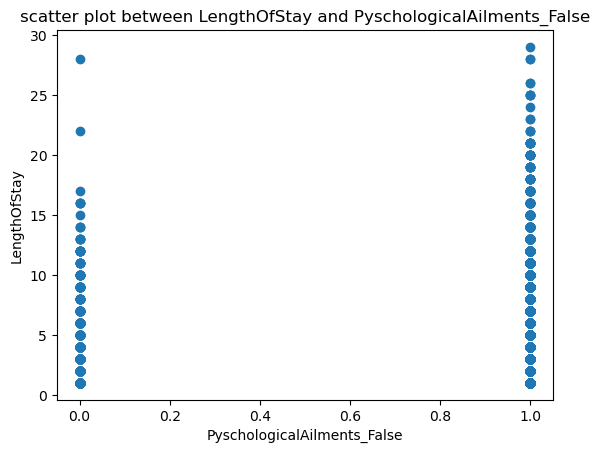

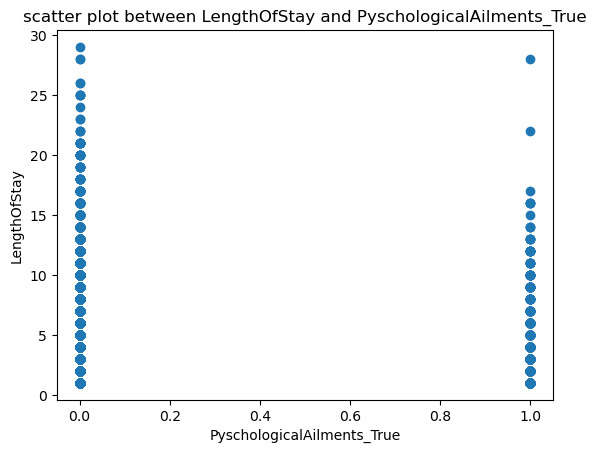

In [36]:
for index,col in enumerate(one_hot_encode_data.columns[1:]):
    pl.scatter(one_hot_encode_data[col], one_hot_encode_data['LengthOfStay'])
    pl.xlabel(col)
    pl.ylabel('LengthOfStay')
    pl.title(f'scatter plot between LengthOfStay and {col}')
    pl.show()

# box plot

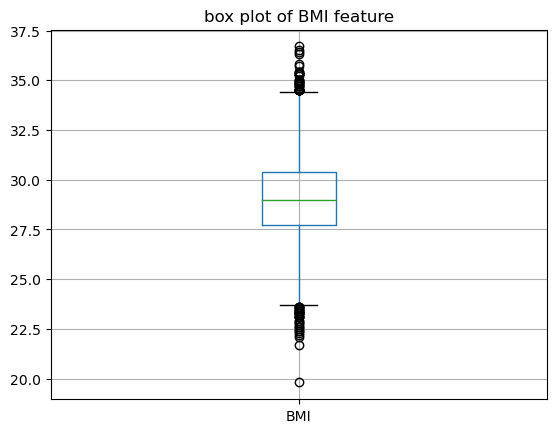

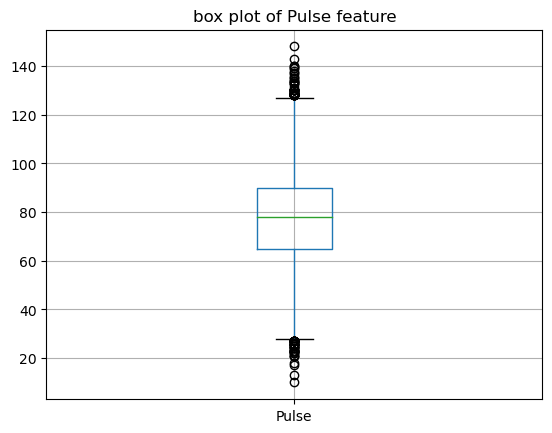

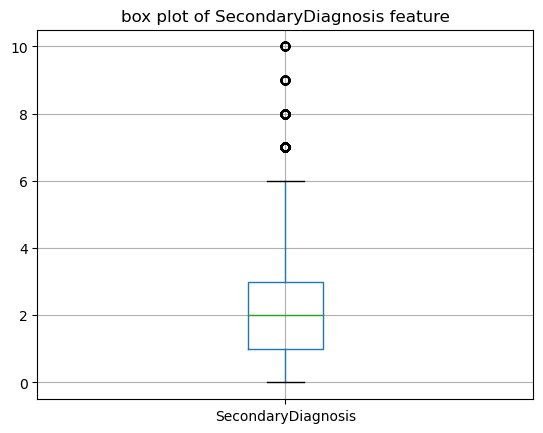

In [46]:
for index,col in enumerate(['BMI','Pulse','SecondaryDiagnosis']):
    one_hot_encode_data.boxplot(column=[col])
    pl.title(f'box plot of {col} feature')
    pl.show()

# splitting target variables and featers

In [47]:
x_df = one_hot_encode_data.iloc[:,1:]
y_df = one_hot_encode_data.iloc[:,0]
print(x_df)
print(y_df)

       ReadmissionCount  FacilityId   BMI    ABG  Pulse  SecondaryDiagnosis  \
0                   2.0        1338  32.7  152.0   64.0                 2.0   
1                   1.0        4964  31.1  165.0  105.0                 1.0   
2                   NaN        7593  32.4  111.0   53.0                 NaN   
3                   NaN        1739  31.2  175.0   44.0                 3.0   
4                   NaN        1703  31.9  114.0   93.0                 4.0   
...                 ...         ...   ...    ...    ...                 ...   
10994               2.0        3019  27.6  107.0   83.0                 2.0   
10995               NaN        9036  26.5  133.0   69.0                 2.0   
10996               1.0        1486  28.5  177.0  108.0                 2.0   
10997               3.0        2590   NaN  138.0    NaN                 2.0   
10998               1.0        3765   NaN  182.0    NaN                 NaN   

       Gender_F  Gender_M  SubstanceAbuseHistory_Fe

# splitting dataset into test and train, test = 20%, train = 80%

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.20, random_state=0)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

       ReadmissionCount  FacilityId   BMI    ABG  Pulse  SecondaryDiagnosis  \
628                 4.0         520  26.0  152.0   78.0                 1.0   
6297                NaN        6024  29.1  161.0   97.0                 3.0   
9252                1.0        3550  27.7  100.0   59.0                 1.0   
5365                NaN        2679  31.0  126.0   59.0                 3.0   
10529               1.0        6304  30.5  148.0   64.0                 2.0   
...                 ...         ...   ...    ...    ...                 ...   
4859                NaN        5653  28.5  137.0   87.0                 3.0   
3264                2.0        9086  28.4  181.0   86.0                 3.0   
9845                2.0        4655  29.3  164.0   59.0                 2.0   
10799               NaN        4365  29.2  165.0   53.0                 5.0   
2732                2.0        4128  27.4  188.0   91.0                 1.0   

       Gender_F  Gender_M  SubstanceAbuseHistory_Fe

In [50]:
print(x_test)
print(y_test)
print(x_test.shape)
print(y_test.shape)

      ReadmissionCount  FacilityId   BMI    ABG  Pulse  SecondaryDiagnosis  \
7262               3.0        9471  31.7  175.0   66.0                 1.0   
4795               NaN        4638  26.3  128.0   62.0                 4.0   
1121               NaN        7829  27.6  125.0   74.0                 3.0   
1328               NaN        5151  30.3  191.0   86.0                 1.0   
8098               NaN        2119  28.6  151.0  112.0                 6.0   
...                ...         ...   ...    ...    ...                 ...   
5738               1.0        4716  30.4  135.0   60.0                 1.0   
4742               2.0         856  31.4  147.0  104.0                 4.0   
6848               NaN        8500  30.5  148.0   91.0                 7.0   
3831               2.0        3403  30.3  121.0   89.0                 3.0   
9419               NaN        9860  32.6  120.0   72.0                 3.0   

      Gender_F  Gender_M  SubstanceAbuseHistory_Few  \
7262    

# checking Null values in Train & Test set

In [51]:
print(x_train.isnull().sum())

ReadmissionCount                 4479
FacilityId                          0
BMI                                 1
ABG                                 0
Pulse                               1
SecondaryDiagnosis                198
Gender_F                            0
Gender_M                            0
SubstanceAbuseHistory_Few           0
SubstanceAbuseHistory_Slight        0
SubstanceAbuseHistory_Some          0
SubstanceAbuseHistory_Unknown       0
SubstanceAbuseHistory_Yes           0
PyschologicalAilments_False         0
PyschologicalAilments_True          0
dtype: int64


In [52]:
print(x_test.isnull().sum())

ReadmissionCount                 1091
FacilityId                          0
BMI                                 1
ABG                                 0
Pulse                               1
SecondaryDiagnosis                 41
Gender_F                            0
Gender_M                            0
SubstanceAbuseHistory_Few           0
SubstanceAbuseHistory_Slight        0
SubstanceAbuseHistory_Some          0
SubstanceAbuseHistory_Unknown       0
SubstanceAbuseHistory_Yes           0
PyschologicalAilments_False         0
PyschologicalAilments_True          0
dtype: int64


# Filling null Values in Test & Train set

In [54]:
x_train.fillna({'BMI': x_train['BMI'].median(), 'Pulse':x_train['Pulse'].median(),
                 'SecondaryDiagnosis':x_train['SecondaryDiagnosis'].median(), 'ReadmissionCount':0}, inplace = True)
print(x_train.isnull().sum())

ReadmissionCount                 0
FacilityId                       0
BMI                              0
ABG                              0
Pulse                            0
SecondaryDiagnosis               0
Gender_F                         0
Gender_M                         0
SubstanceAbuseHistory_Few        0
SubstanceAbuseHistory_Slight     0
SubstanceAbuseHistory_Some       0
SubstanceAbuseHistory_Unknown    0
SubstanceAbuseHistory_Yes        0
PyschologicalAilments_False      0
PyschologicalAilments_True       0
dtype: int64


In [56]:
x_test.fillna({'BMI': x_test['BMI'].median(), 'Pulse':x_test['Pulse'].median(),
                 'SecondaryDiagnosis':x_test['SecondaryDiagnosis'].median(), 'ReadmissionCount':0}, inplace = True)
print(x_test.isnull().sum())

ReadmissionCount                 0
FacilityId                       0
BMI                              0
ABG                              0
Pulse                            0
SecondaryDiagnosis               0
Gender_F                         0
Gender_M                         0
SubstanceAbuseHistory_Few        0
SubstanceAbuseHistory_Slight     0
SubstanceAbuseHistory_Some       0
SubstanceAbuseHistory_Unknown    0
SubstanceAbuseHistory_Yes        0
PyschologicalAilments_False      0
PyschologicalAilments_True       0
dtype: int64


# Linear regression

In [58]:
ols = LinearRegression()
ols.fit(x_train,y_train)

LinearRegression()

In [69]:
print('RMSE in Train: '+str(round(math.sqrt(mean_squared_error(y_train,ols.predict(x_train))),2)))
print('R2 in Train: '+str(round(r2_score(y_train,ols.predict(x_train)),2)))

print('RMSE in Test: '+ str(round(math.sqrt(mean_squared_error(y_test,ols.predict(x_test))),2)))
print('R2 in Test: '+ str(round(r2_score(y_test,ols.predict(x_test)),2)))

RMSE in Train: 1.91
R2 in Train: 0.66
RMSE in Test: 2.12
R2 in Test: 0.6
